# Вариант 9, Ягилев

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# min = (1, pi/4)

GAMMA = 10

def F1(x, y):
    return y - np.arctan(x)

def F2(x, y):
    return x - 1

def f1(x, y):
    return (GAMMA ** 2) * (F1(x, y) ** 2) + (F2(x, y) ** 2)

def f2(x, y):
    return (GAMMA ** 2) * np.cosh(F1(x, y)) + np.cosh(F2(x, y))


def f3(x, y):
    return (GAMMA ** 2) * abs(F1(x, y)) + abs(F2(x, y))

In [4]:
# Численное нахождение градиента и гессиана
def get_grad(func, x, y, h):
    f = func(x, y)
    g1 = (func(x+h, y) - f) / h
    g2 = (func(x, y+h) - f) / h
    return g1, g2

def get_hes(func, x, y, h):
    f = func(x, y)
    f01 = func(x+2*h, y)
    f02 = func(x+h, y+h)
    f03 = func(x, y+2*h)
    f04 = func(x+h, y)
    f05 = func(x, y+h)
    hes1 = (f01 - 2 * f04 + f) / h**2
    hes2 = (f02 - f04 - f05 + f) / h**2
    hes3 = (f03 - 2 * f05 + f) / h**2
    return hes1, hes2, hes3

### Построение сеточного графика и линий уровня функции двух переменных

In [5]:
def makeData(f_xy):
    # Строим сетку в интервале от -3.5 до 3.5, имеющую 100 отсчетов по обоим координатам
    x = np.linspace(-3.5, 3.5, 200)
    y = np.linspace(-3.5, 3.5, 200)

    # Создаем двумерную матрицу-сетку
    xgrid, ygrid = np.meshgrid(x, y)

    # В узлах рассчитываем значение функции
    z = f_xy(xgrid, ygrid)

    return xgrid, ygrid, z

def get_graph(f_xy, elev=None, azim=None, roll=None, slice=100):
    x, y, z = makeData(f_xy)

    # Сеточный график
    fig = plt.figure()
    axes = fig.add_subplot(projection='3d')
    axes.view_init(elev=elev, azim=azim, roll=roll)
    axes.set_xlabel('$X$')
    axes.set_ylabel('$Y$')
    axes.set_zlabel('$Z$')
    axes.plot_surface(x, y, z, rstride=5, cstride=5, cmap='plasma')
    plt.show()
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(projection='3d')
    ax2.view_init(elev=elev, azim=azim, roll=roll)
    ax2.set_xlabel('$X$')
    ax2.set_ylabel('$Y$')
    ax2.set_zlabel('$Z$')
    z2 = (slice * x / x)
    z2 = [[z2[i][j] if z2[i][j] < z[i][j] else z[i][j] for j in range(len(z2[i]))] for i in range(len(z2))]
    z2 = np.array(z2, dtype=float)
    ax2.plot_surface(x, y, z2, rstride=5, cstride=5, cmap='plasma')
    plt.show()
    # Линии уровня
    cs = plt.contour(x, y, z, levels=10)
    plt.clabel(cs)
    plt.show()

# Построение графика траектории поиска
def graph_of_searchline(func, x_lst):
    x, y, z = makeData(func)
    cs = plt.contour(x, y, z, levels=10)
    plt.clabel(cs)

    xlist = [el[0] for el in x_lst]
    ylist = [el[1] for el in x_lst]
    plt.scatter(xlist, ylist, s=5)

##### Для первой фукнции

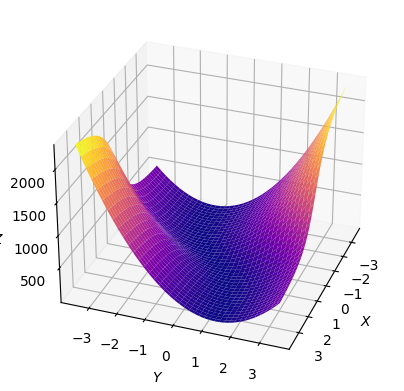

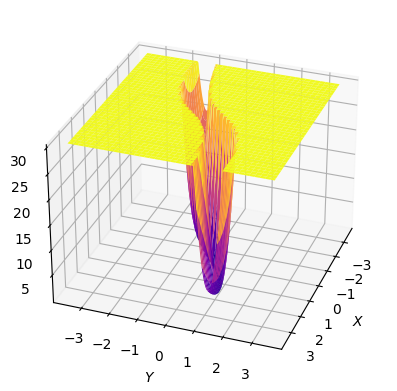

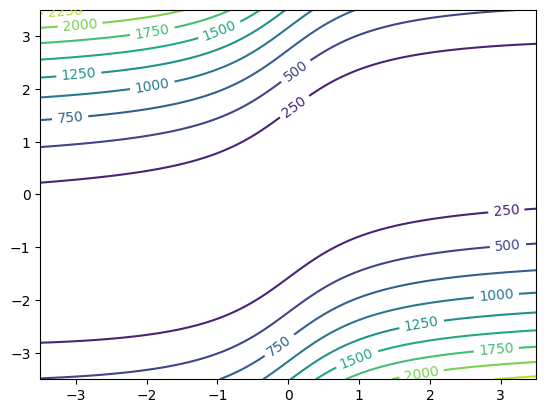

In [6]:
get_graph(f1, elev=None, azim=20, roll=None, slice=30)

##### Для второй фукнции

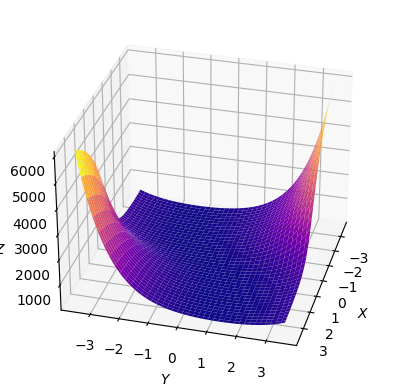

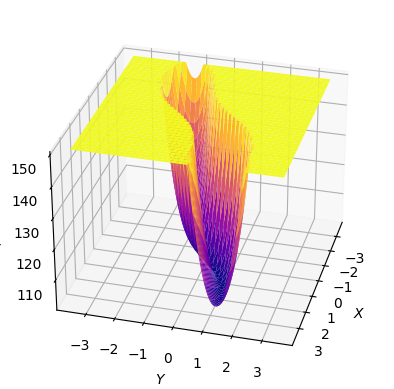

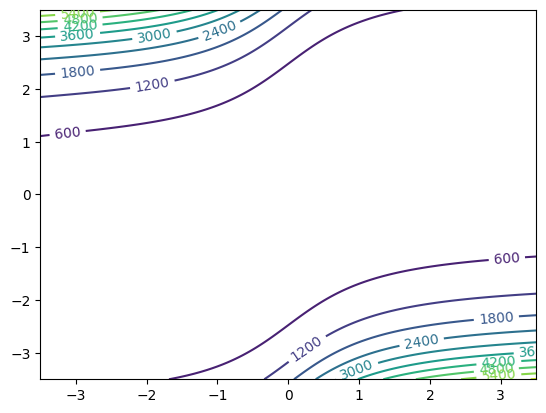

In [7]:
get_graph(f2, elev=None, azim=15, roll=None, slice=150)

##### Для третьей фукнции

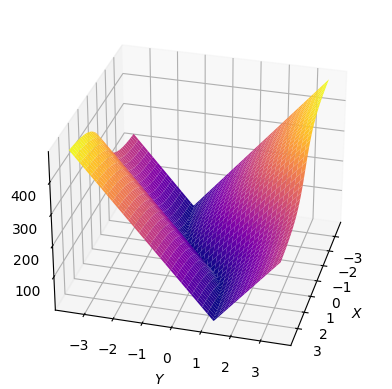

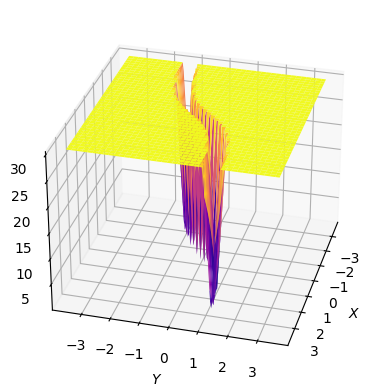

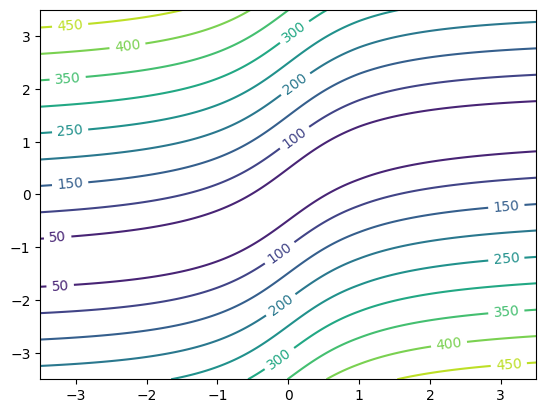

In [8]:
get_graph(f3, elev=None, azim=15, roll=None, slice=30)

## Методы второго порядка

### Метод Ньютона

In [47]:
def newton(func, xb, maxiter, eps):
    x_lst = list() # список для траектории поиска

    exitflag = -1
    iters = 0
    xk = xb

    for j in range(maxiter):
        x_lst.append(xk)
        hes1, hes2, hes3 = get_hes(func, xk[0], xk[1], 0.00001)

        H = np.array([[hes1, hes2], [hes2, hes3]])
        eigenValues = np.linalg.eig(H)[0]

        minEig = min(eigenValues)

        if minEig < 0:
            exitflag = 2
            break

        g1, g2 = get_grad(func, xk[0], xk[1], 0.00001)

        g = np.array([g1, g2])

        Hinv = np.linalg.inv(H)
        p = - np.dot(Hinv, g)

        xPrev = np.array(xk)
        xk = xk + p

        ng = np.linalg.norm(xk - xPrev)

        if ng <= eps:
            exitflag = 1
            iters = j + 1
            x_lst.append(xk)
            break

    xm = xk
    fv = func(xk[0], xk[1])
    graph_of_searchline(func, x_lst)
    
    msg = f"Начальная точка = {xb}\n"
    if exitflag != 2:
        msg += f"Решение найдено в точке = {xm}, значение функции = {fv}\n"
        if exitflag == 1:
            msg += f"Решение было найдено за количество итераций = {iters}\n"
        else:
            msg += f"Решение найдено по истечению максимального количества итераций = {maxiter}\n"
    else:
        msg += f"Метод Ньютона из точки неприменим, последняя точка = {x_lst[-1]}\n"
    print(msg)

#### Результат работы метода для первой функции

Начальная точка = [2, 2]
Решение найдено в точке = [0.99961981 0.78520303], значение функции = 1.470426853980052e-07
Решение было найдено за количество итераций = 5

Начальная точка = [-2, -2]
Метод Ньютона из точки неприменим, последняя точка = [ 0.8253324  -0.44648792]



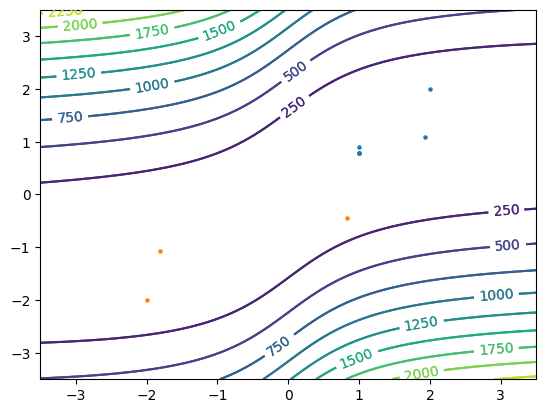

In [48]:
newton(f1, xb=[2, 2], maxiter=15000, eps=0.0001)
newton(f1, xb=[-2, -2], maxiter=15000, eps=0.0001)

#### Результат работы метода для второй функции

Начальная точка = [2, 2]
Решение найдено в точке = [0.9996198120437894, 0.7852030332773471], значение функции = 101.00000007352145
Решение было найдено за количество итераций = 8

Начальная точка = [-2, -2]
Решение найдено в точке = [0.999619810777177, 0.7852030326344728], значение функции = 101.00000007352193
Решение было найдено за количество итераций = 11



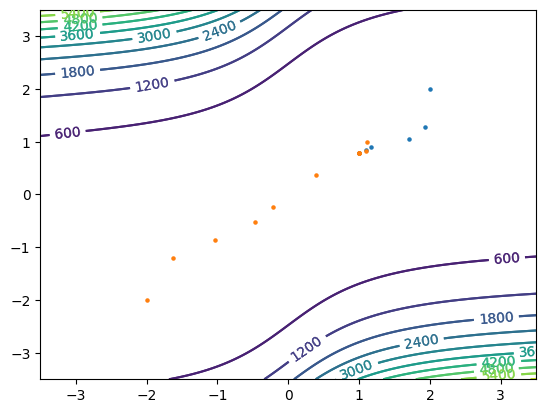

In [11]:
newton(f2, xb=[2, 2], maxiter=15000, eps=0.0001)
newton(f2, xb=[-2, -2], maxiter=15000, eps=0.0001)

### Метод Ньютона-Рафсона

In [134]:
def goldenratio(func, xb): # Метод золотого сечения
    x, y = xb[0], xb[1]
    eps = 0.01
    a = 0.8
    b = 0.9
    k1 = (3 - 5**0.5) / 2
    k2 = (5**0.5 - 1) / 2
    l1 = a + k1 * (b - a)
    l2 = a + k2 * (b - a)
    f1 = l1 * func(x,y)
    f2 = l2 * func(x,y)
    while (b - a) / 2 >= eps:
        if f1 < f2:
            b, l2, f2 = l2, l1, f1
            l1 = a + k1 * (b - a)
            f1 = l1 * func(x, y)
        else:
            a, l1, f1 = l1, l2, f2
            l2 = a + k2 * (b - a)
            f2 = l2 * func(x, y)
    return (a + b) / 2


def newtonRaphson(func, xb, maxiter, eps):
    x_lst = list() # список для траектории поиска

    exitflag = -1
    iters = 0
    xk = xb

    alpha = goldenratio(func, xk)

    for j in range(maxiter):
        x_lst.append(xk)
        hes1, hes2, hes3 = get_hes(func, xk[0], xk[1], 0.00001)

        H = np.array([[hes1, hes2], [hes2, hes3]])
        eigenValues = np.linalg.eig(H)[0]

        minEig = min(eigenValues)

        if minEig < 0:
            exitflag = 2
            break

        g1, g2 = get_grad(func, xk[0], xk[1], 0.00001)

        g = np.array([g1, g2])

        Hinv = np.linalg.inv(H)
        p = - np.dot(Hinv, g)

        xPrev = np.array(xk)
        xk = xk + p * alpha

        ng = np.linalg.norm(xk - xPrev)

        if ng <= eps:
            exitflag = 1
            iters = j + 1
            x_lst.append(xk)
            break

    xm = xk
    fv = func(xk[0], xk[1])
    graph_of_searchline(func, x_lst)
    
    msg = f"Начальная точка = {xb}\n"
    if exitflag != 2:
        msg += f"Решение найдено в точке = {xm}, значение функции = {fv}\n"
        if exitflag == 1:
            msg += f"Решение было найдено за количество итераций = {iters}\n"
        else:
            msg += f"Решение найдено по истечению максимального количества итераций = {maxiter}\n"
    else:
        msg += f"Метод Ньютона из точки неприменим, последняя точка = {x_lst[-1]}\n"
    print(msg)

#### Результат работы метода для первой функции

Начальная точка = [2, 2]
Решение найдено в точке = [0.99963255 0.78521017], значение функции = 1.3680976054727457e-07
Решение было найдено за количество итераций = 11

Начальная точка = [-2, -2]
Решение найдено в точке = [0.99963246 0.78521012], значение функции = 1.3687943655471982e-07
Решение было найдено за количество итераций = 16



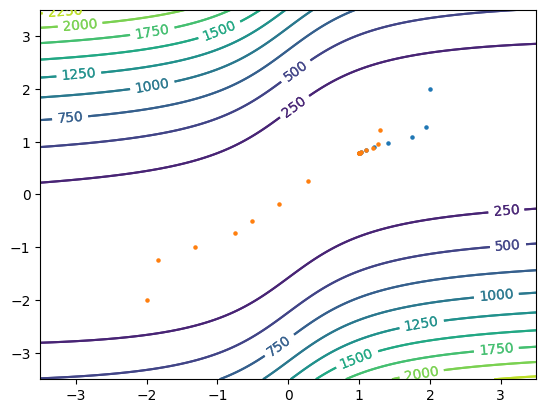

In [135]:
newtonRaphson(f1, xb=[2, 2], maxiter=15000, eps=0.0001)
newtonRaphson(f1, xb=[-2, -2], maxiter=15000, eps=0.0001)

#### Результат работы метода для второй функции

Начальная точка = [2, 2]
Решение найдено в точке = [0.99962483 0.78520585], значение функции = 101.0000000714783
Решение было найдено за количество итераций = 12

Начальная точка = [-2, -2]
Решение найдено в точке = [0.99963312 0.78521055], значение функции = 101.00000006815804
Решение было найдено за количество итераций = 15



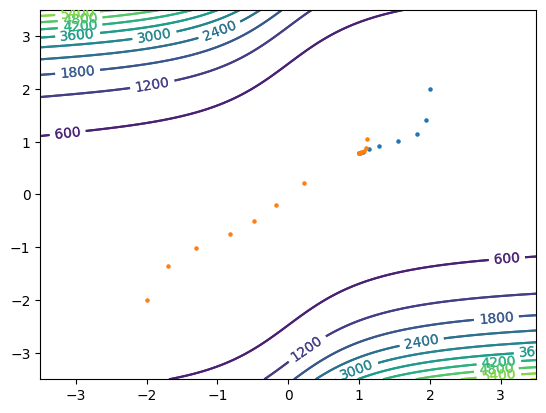

In [136]:
newtonRaphson(f2, xb=[2, 2], maxiter=15000, eps=0.0001)
newtonRaphson(f2, xb=[-2, -2], maxiter=15000, eps=0.0001)

##### Вывод по методам Ньютона:

Оба метода нашли минимум функций с заданной точностью за гораздо меньшее количество итерации в сравнении с методом наискорейшего спуска, реализованным в прошлой лабораторной работе. Но, стоит отметить, что метод Ньютона неприменим для первой функции из начальной точки = (-2, -2). Эту проблему решает метод Ньютона-Рафсона, корректирующий величину шага параметром альфа, найденным на каждой итерации методом золотого сечения. Количество итераций для метода Ньютона-Рафсона незначительно выше, чем для метода Ньютона, что компенсируется более свободным выбором начального приближения.

## Методы сопряжённых градиентов

### Метод Полака-Рибьера

In [139]:
def brent(func, p, xk, tol=1e-6):
    a = 0.0
    b = 1.0

    xkA = xk + a * p
    xkB = xk + b * p
    fa = func(xkA[0], xkA[1])
    fb = func(xkB[0], xkB[1])

    if fa < fb:
        a, b = b, a
        fa, fb = fb, fa

    c = a
    fc = fa
    m = 0.5 * (a + b)
    s = m
    xkS = xk + s * p
    fs = func(xkS[0], xkS[1])

    while np.abs(b - 1) > tol:
        if fs < fb:
            a = s
            fa = fs
            s = m
            m = 0.5 * (a + b)
            xkS = xk + s * p
            fs = func(xkS[0], xkS[1])
        else:
            b = m
            fb = fs
            s = m
            m = 0.5 * (a + b)
            xkS = xk + s * p
            fs = func(xkS[0], xkS[1])
        
        if fa < fc:
            c, fc = a, fc
        elif fb < fc:
            c, fc = b, fb
    
    alpha = (a + b) / 2.0
    return alpha

def polakRibiere(func, xb, maxiter, eps):
    x_lst = list() # список для траектории поиска

    exitflag = -1
    iters = 0
    xk = xb

    beta = 0
    g1, g2 = get_grad(func, xb[0], xb[1], 0.00001)
    gPrev = np.array([g1, g2])
    p = -gPrev

    for j in range(maxiter):
        x_lst.append(xk)

        # alpha = goldenratio(func, xk)
        alpha = 0.00005
        xNext = xk + alpha * p

        print(alpha, xNext)

        g1, g2 = get_grad(func, xNext[0], xNext[1], 0.00001)
        gNext = np.array([g1, g2])

        if j % 5 == 0:
            beta = 0
        else:
            beta = np.dot(gNext, gNext-gPrev) / np.linalg.norm(gPrev)

        pNext = - gNext + beta * p

        ng = np.linalg.norm(xNext - xk)

        if ng <= eps:
            exitflag = 1
            iters = j + 1
            x_lst.append(xk)
            break

        xk, gPrev, p = xNext, gNext, pNext

    xm = xk
    fv = func(xk[0], xk[1])
    graph_of_searchline(func, x_lst)
    
    msg = f"Начальная точка = {xb}\n"
    msg += f"Решение найдено в точке = {xm}, значение функции = {fv}\n"
    if exitflag == 1:
        msg += f"Решение было найдено за количество итераций = {iters}\n"
    else:
        msg += f"Решение найдено по истечению максимального количества итераций = {maxiter}\n"
    print(msg)

5e-05 [2.00168569 1.99107144]
5e-05 [2.00335031 1.98223553]
5e-05 [2.00189912 1.98991984]
5e-05 [2.00116769 1.99376899]
5e-05 [2.00283868 1.98490507]
5e-05 [2.00137183 1.99266728]
5e-05 [2.00059621 1.99674797]
5e-05 [2.00227425 1.98785312]
5e-05 [2.00079002 1.99570175]
5e-05 [1.99996468 2.0000426 ]
5e-05 [2.00165053 1.99111354]
5e-05 [2.00014694 1.99905824]
5e-05 [1.99926549 2.00369232]
5e-05 [2.00095999 1.99472537]
5e-05 [1.99943483 2.0027771 ]
5e-05 [1.99848983 2.00774287]
5e-05 [2.00019394 1.99873386]
5e-05 [1.99864466 2.00690512]
5e-05 [1.99762738 2.01224755]
5e-05 [1.9993422  2.00319176]
5e-05 [1.99776586 2.01149687]
5e-05 [1.99666601 2.01726889]
5e-05 [1.99839278 2.00816096]
5e-05 [1.99678601 2.01661642]
5e-05 [1.99559135 2.02288082]
5e-05 [1.9973315  2.01371461]
5e-05 [1.99569037 2.02233955]
5e-05 [1.99438623 2.02917137]
5e-05 [1.9961414  2.01993984]
5e-05 [1.99446132 2.02875654]
5e-05 [1.99302995 2.03624636]
5e-05 [1.99480205 2.02694136]
5e-05 [1.9930776  2.03597602]
5e-05 [1.9

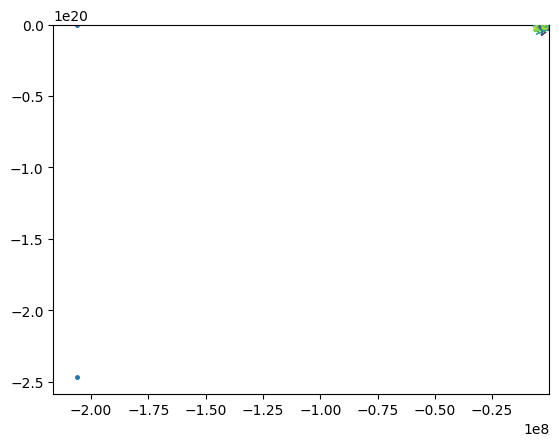

In [140]:
polakRibiere(f1, xb=[2, 2], maxiter=15000, eps=0.0001)

/tmp/ipykernel_3968/2895465811.py:15: RuntimeWarning: overflow encountered in cosh
  return (GAMMA ** 2) * np.cosh(F1(x, y)) + np.cosh(F2(x, y))
/tmp/ipykernel_3968/2043708458.py:4: RuntimeWarning: invalid value encountered in scalar subtract
  g1 = (func(x+h, y) - f) / h
/tmp/ipykernel_3968/2043708458.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  g2 = (func(x, y+h) - f) / h


Начальная точка = [2, 2]
Решение найдено в точке = [nan nan], значение функции = nan
Решение найдено по истечению максимального количества итераций = 15000



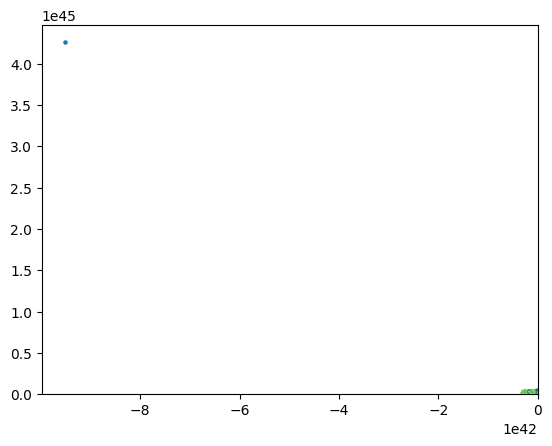

In [125]:
polakRibiere(f2, xb=[2, 2], maxiter=15000, eps=0.0001)